In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
import matplotlib
import seaborn as sns

plt.gray()
lena= rgb2gray(imread('../lab_images/lena.tiff'))
cameraman = imread('../lab_images/cameraman.tif').astype(np.float64)/255
plt.gray() # makes image plots grayscale


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


<Figure size 640x480 with 0 Axes>

2 Discrete Convolution for Image Processing

In [2]:
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])
h1, h2, h3

(array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]]),
 array([[0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667]]),
 array([[-1,  1]]))

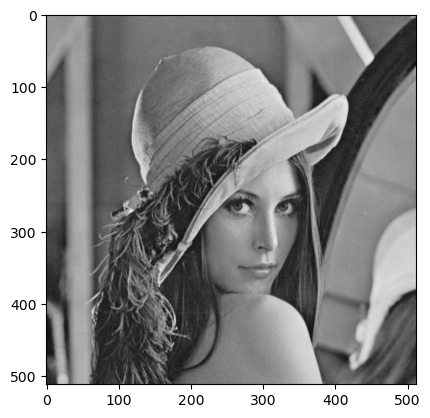

In [3]:
matplotlib.pyplot.imshow(lena, vmin=0, vmax=1)

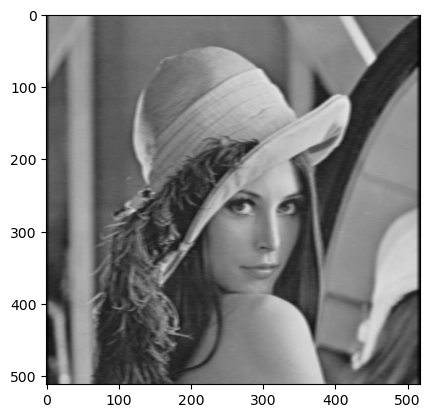

In [4]:
lena_h1 = signal.convolve2d(lena, h1)
matplotlib.pyplot.imshow(lena_h1, vmin=0, vmax=1)

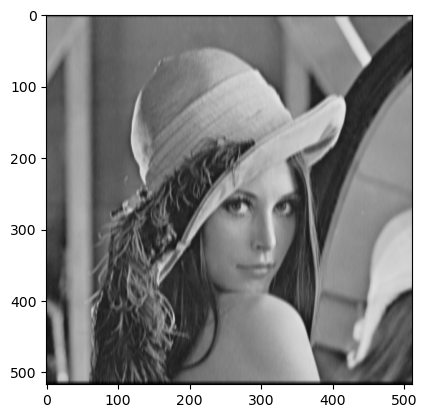

In [5]:
lena_h2 = signal.convolve2d(lena, h2)
matplotlib.pyplot.imshow(lena_h2, vmin=0, vmax=1)

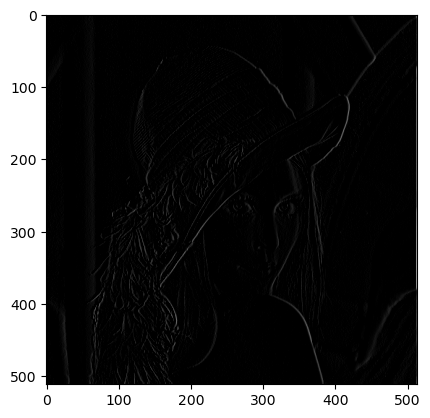

In [6]:
lena_h3 = signal.convolve2d(lena, h3)
matplotlib.pyplot.imshow(lena_h3, vmin=0, vmax=1)

1. What did convolving the image with h1 do to the image? Looking at the impulse function, explain why convolving the image with h1 yields such results.

Convolving the image with h1 smoothed out the image, making it blurry. Looking at the impulse function, it's a 1x6 matrix with weights 1/6 for all values. Since the impulse response has equal weights, it's essentially taking the average of neighbouring pixels (in the horizontal direction). By doing this, the convolution with h1 reduces the variation between adjacent pixels. Hence, it's a low pass filter (weights are positive values and DC gain is 1) so it reduces high-frequency components (like edges and fine details) in the image, creating a blurring effect.

2. What did convolving the image with h2 do to the image? Looking at the impulse function, explain why convolving the image with h2 yields such results.

Convolving the image with h2 also blurs the image. It's similar to h1, although in this case it takes the average of neighbouring pixels in the vertical direction, since it's a 6x1 matrix with equal weights 1/6. Thus, it's still a low pass filters with positive weights and DC gain 1 that reduces fine details, leading to a blurred effect.

3. What did convolving the image with h3 do to the image? Looking at the impulse function, explain why convolving the image with h3 yields such results.

Convolving the image with h3 extracts edges from the image. Looking at the impulse function, it essentially subtracts the value of one pixel from the value of the pixel immediately to its right. Hence, it detects changes between neighboring pixel values. When there is a significant change in intensity, such as edges, the convolution with h3 will emphasize the vertical edges.

4. Based on these results, what role can convolution perform in the context of image processing?
Convolution can help with image enhancement...


3 Noise Generation

In [7]:
def im_hist_show(image, image_title, histogram_title, vmin=0, vmax=1):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    image_flattened = image.flatten()
    axs[0].imshow(image, vmin=vmin, vmax=vmax)
    axs[1].hist(image_flattened)
    axs[0].set_title(image_title)
    axs[1].set_title(histogram_title)
    axs[1].set_xlabel("Pixel Intensity (k)")
    axs[1].set_ylabel("Pixel Count (n_k)")

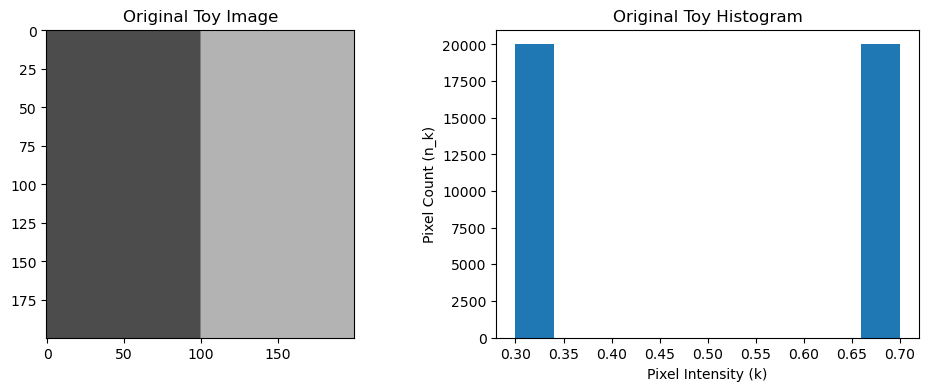

In [8]:
f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])
im_hist_show(f,'Original Toy Image', 'Original Toy Histogram')

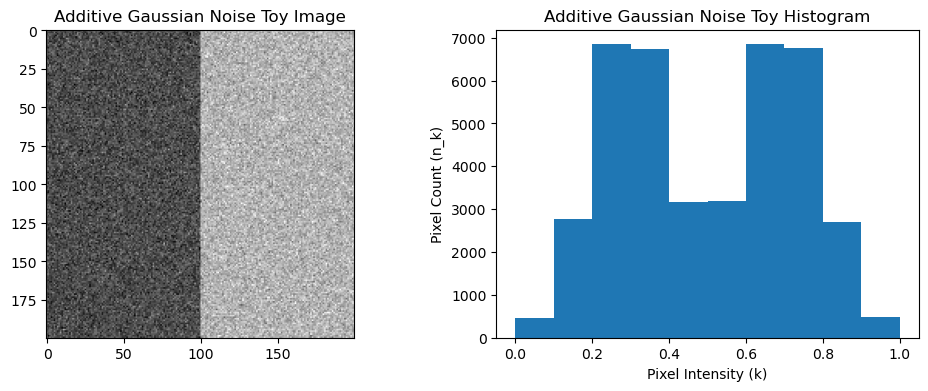

In [9]:
f_gaussian = skimage.util.random_noise(f, mode='gaussian')
im_hist_show(f_gaussian,'Additive Gaussian Noise Toy Image', 'Additive Gaussian Noise Toy Histogram')

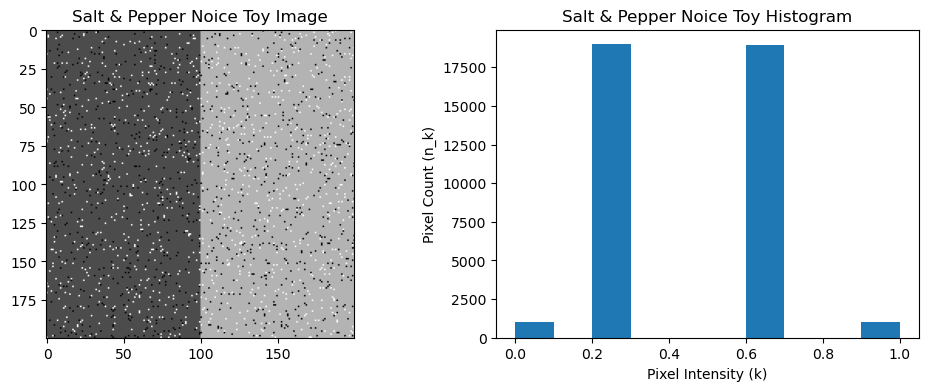

In [10]:
f_salt_pepper = skimage.util.random_noise(f, mode='s&p')
im_hist_show(f_salt_pepper,'Salt & Pepper Noice Toy Image', 'Salt & Pepper Noice Toy Histogram')

In [11]:
def imnoise_speckle(im, v=0.04):
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    return im + im * n

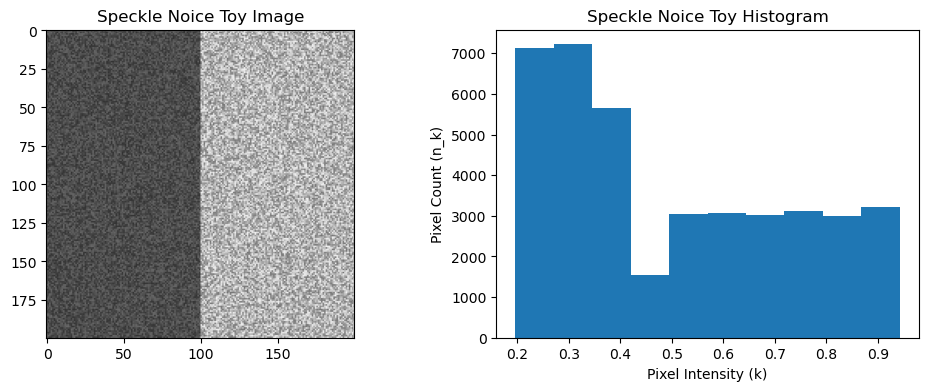

In [12]:
im_hist_show(imnoise_speckle(f),'Speckle Noice Toy Image', 'Speckle Noice Toy Histogram')

5. Describe each of the histograms in the context of the corresponding noise models. Why do they appear that way?

The Gaussian noise histogram spreads out the intensities symmetrically around the original values without shifting the mean, leading to two discrete Gaussian curves. The salt and pepper noise histogram shows a percentage of pixels at the mininimum and maximum intensities while the rest of the pixels stay at their original intensities. This makes sense as the salt and pepper noise model randomly sets a specified percentage of pixels to either the minimum or maximum intensity. Lastly, the speckle noise histogram is broadened and skewed towards darker values because the multiplicative nature of the noise reduces high-intensity pixels more often than it increases them, resulting in more low-intensity values and a spread-out distribution.

6. Are there visual differences between the noise contaminated images? What are they? Why?

Yes, there are some differences between each noise contaminated images. The salt and pepper noise toy image is quite different as it includes extrememe pixel intensity changes. Since salt and pepper noise randomly replaces a percentage of pixels with the minimum and maximum intensity values, we can observe a distinct, abrupt change in pixel values in the image. 
For the Gaussian noise, the image becomes grainy and a bit blurry, but doesn't have any abrupt changes. This is because Gaussian noise is additive and follows a normal distribution, which creates a more uniform spread of noise across the image. Lastly, the speckle noise image is also grainy but not as blurry as the Gaussian noise image. Speckle noise is multiplicative, meaning it scales pixel values based on their original intensity. Hence, it affects the entire image's contrast and introduces variability in both low and high-intensity areas.

7. In the speckle noise case, what is the underlying distribution used? Can you tell from the histogram?
How?


8. In the speckle noise case, you will notice that the peaks of the histogram are no longer of the same
height as they were in the original image. Also, the spread around each of the peaks is also different
from each other. Why? Hint: Noise is multiplicative.


4 Noise Reduction in the Spatial Domain

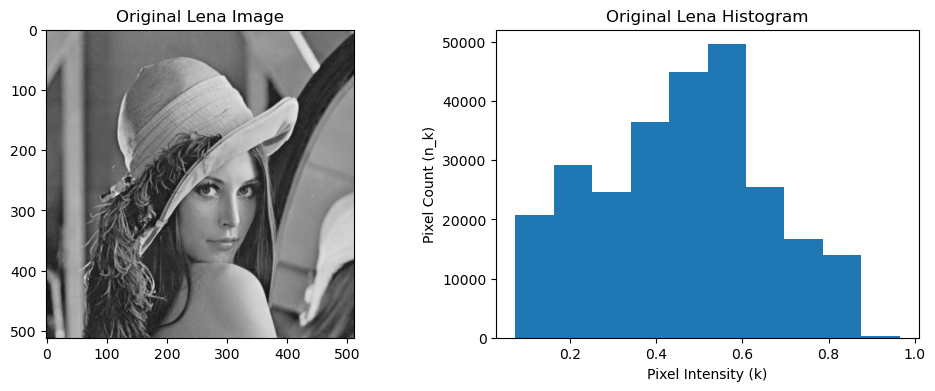

In [13]:
im_hist_show(lena,'Original Lena Image', 'Original Lena Histogram')

26.995311393513465

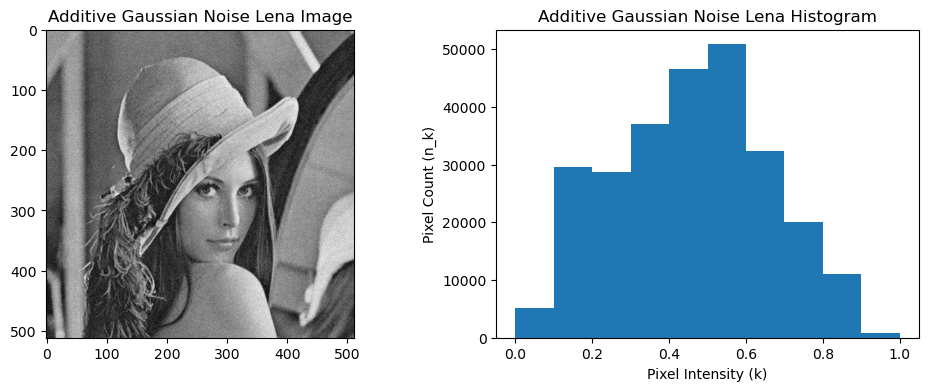

In [14]:
lena_gaussian = skimage.util.random_noise(lena, mode='gaussian', var = 0.002)
im_hist_show(lena_gaussian,'Additive Gaussian Noise Lena Image', 'Additive Gaussian Noise Lena Histogram')
PSNR(lena, lena_gaussian)

In [15]:
def avg_filter(n):
    avg_filter = np.ones((n,n))/(n*n)
    return avg_filter

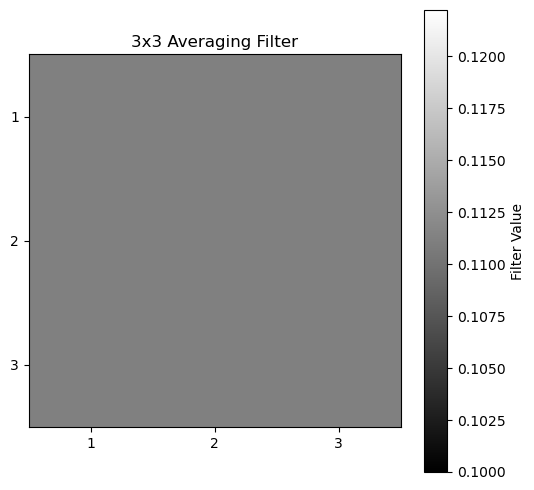

In [16]:
# Plot the 3x3 averaging filter as a matrix
plt.figure(figsize=(6, 6))
plt.imshow(avg_filter(3), cmap='gray', interpolation='nearest')
plt.title('3x3 Averaging Filter')
plt.colorbar(label='Filter Value')
plt.xticks(np.arange(3), np.arange(1, 4))
plt.yticks(np.arange(3), np.arange(1, 4))
plt.grid(False)
plt.show()

In [17]:
denoised_lena_3x3 = ndimage.convolve(lena_gaussian, avg_filter(3))

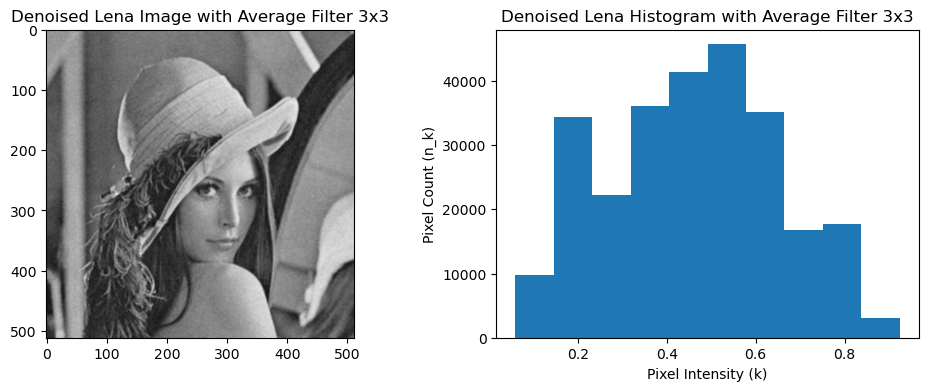

In [18]:
im_hist_show(denoised_lena_3x3,'Denoised Lena Image with Average Filter 3x3', 'Denoised Lena Histogram with Average Filter 3x3')

In [19]:
PSNR(lena, denoised_lena_3x3)

31.615082459059074

9. Compare the visual difference between the noisy image and the denoised image. How well did it work? Why? Did the PSNR decrease?

Visual Difference: The denoised image looks smoother compared to the noisy one, since the averaging filter blurs the noise.

How Well It Worked: The denoising removes some of the Gaussian noise, but it also made the image lose its details and sharpness due to the smoothing effect of the averaging filter. Generally, both the noisy and denoised images look pretty similar. 

PSNR: The PSNR increased after denoising since the noise is reduced. This makes sense as it removed some of the noise, but visually it isn't clear that the quality improved.

10. Compare the histograms of the noise-free, noisy, and denoised images. What happened? Why?

Noise-Free Histogram: The histogram of the original image almost has a gaussian distribution but with larger amounts of dark pixels.

Noisy Histogram: The noisy image histogram shows a broader distribution of pixel values due to the added Gaussian noise. Specifically, there is less dark pixels of value 0 and more in the range of 0.3 and 0.6 compared to the noise-free image.

Denoised Histogram: After applying the averaging filter, the histogram is more spread out.

11. Based on the visual quality of the denoised image, what are the benefits and drawbacks associated with the average filter?

Benefits:
It reduces Gaussian noise.
Simple to implement.

Drawbacks:
It can cause a loss of important details and sharpness due to excessive smoothing.
Blurs edges and fine structures in the image, which may decrease the visual quality of the denoised image.

Let us now create a 7×7 averaging filter kernel and apply it to the noisy image. Plot the denoised image
and the corresponding histogram. Also, compute the PSNR between the denoised image and the original
noise-free image.

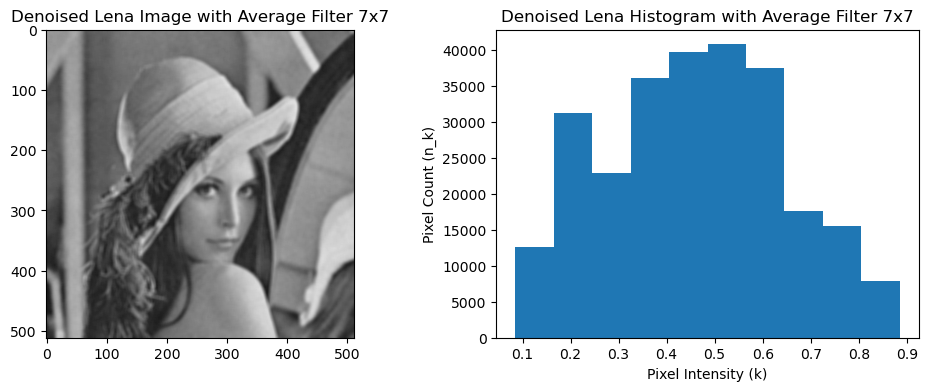

In [20]:
avg_filter_7x7 = avg_filter(7)
denoised_lena_avg_7x7 = ndimage.convolve(lena_gaussian, avg_filter_7x7)
im_hist_show(denoised_lena_avg_7x7,'Denoised Lena Image with Average Filter 7x7', 'Denoised Lena Histogram with Average Filter 7x7')

In [21]:
PSNR(lena, denoised_lena_avg_7x7)

27.069718763614915

12. Compare the visual difference between the denoised image from the 7x7 filtering kernel and the denoised image from the 3x3 filtering kernel. Are there any differences? Why? Did the PSNR decrease? Why?

Visual Differences: The 7x7 filter produces a much smoother image compared to the 3x3 filter, but it also results in more blurring, especially in areas with fine details and edges.

PSNR: The PSNR with the 7x7 filter has decreased compared to the 3x3 filter. This happens because, even though the noise is reduced more effectively with a larger kernel, the loss of detail (blurring) increases, lowering the overall image quality relative to the 3x3 kernel.

13. Compare the histograms of the two denoised images. What are the differences? Why?

The histogram for the 7x7 filtered image shows a more concentrated spread in the middle intensity area, as the larger filter smooths the image more effectively. The 3x3 filter will have more variation in pixel intensity, leading to a broader histogram. 
This difference occurs because the 7x7 filter averages a larger number of pixels, reducing both noise and detail, while the 3x3 filter balances noise reduction and detail preservation better.

14. Based on the visual quality of the denoised image, what are the benefits and drawbacks associated with using a larger window size?

Benefits: The 7x7 filter more effectively reduces noise, especially in areas with uniform pixel intensities, leading to a cleaner image in terms of noise reduction.

Drawbacks: Larger window sizes cause more blurring, resulting in a larger loss of fine details and edge sharpness. Thus, the 7x7 kernel is not useful when keeping details is important.

Let us now create a 7×7 Gaussian filter kernel with a standard deviation of 1 using the provided gaussian
filter function. Plot the filter. Plot the denoised image and the corresponding histogram. Also, compute
the PSNR between the denoised image and the original noise-free image.

In [22]:
gaussian_filter_7x7 = gaussian_filter(7, 7, 1)

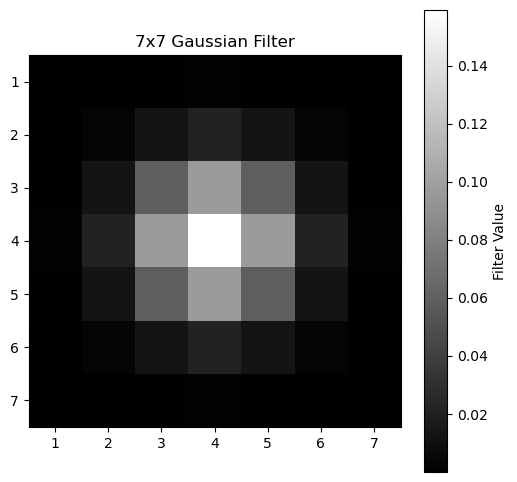

In [23]:
# Plot the 3x3 averaging filter as a matrix
plt.figure(figsize=(6, 6))
plt.imshow(gaussian_filter_7x7, cmap='gray', interpolation='nearest')
plt.title('7x7 Gaussian Filter')
plt.colorbar(label='Filter Value')
plt.xticks(np.arange(7), np.arange(1, 8))
plt.yticks(np.arange(7), np.arange(1, 8))
plt.grid(False)
plt.show()

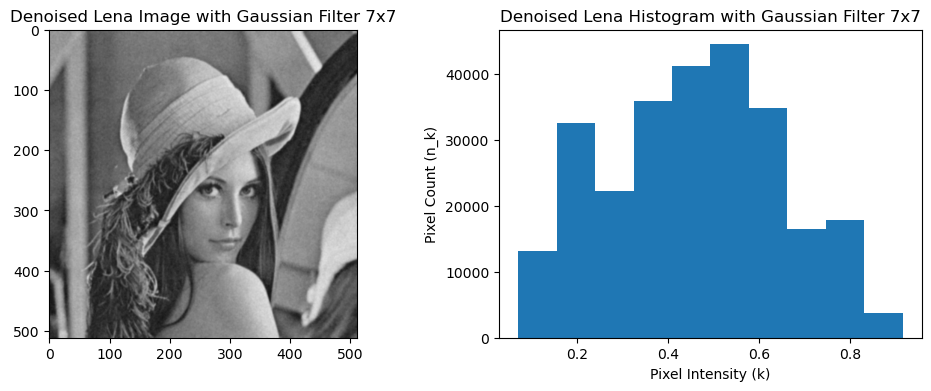

In [24]:
denoised_lena_gaussian_7x7 = ndimage.convolve(lena_gaussian, gaussian_filter_7x7)
im_hist_show(denoised_lena_gaussian_7x7,'Denoised Lena Image with Gaussian Filter 7x7', 'Denoised Lena Histogram with Gaussian Filter 7x7')

In [25]:
PSNR(lena, denoised_lena_gaussian_7x7)

31.62389027660272

15. Compare the visual difference between the denoised image from the Gaussian filtering kernel and the denoised images from the averaging filter kernels. Are there any differences? Why? Did the PSNR decrease? Why?

The denoised image from the Gaussian filtering kernal has more detail than the denoised image from the averaging filter. As well, the Gaussian filtering kernel image is grainier than the average filtering kernel image. Gaussian filtering typically results in smoother edges compared to the averaging filter because it gives more weight to the central pixels and less to distant ones. Also, Gaussian filtering results in a higher PSNR due to the more refined noise reduction.

16. Compare the histograms of the denoised image using the Gaussian filtering kernel and the denoised images from the averaging filter kernels. What are the differences? Why?

The histogram for the image processed by the Gaussian filter is pretty similar to the image processed by the average filter. There is more contrast for the Gaussian filtering kernel image based on the peaks of intensities. The averaging filter flattens the histogram more uniformly due to its uniform smoothing effect, showing less contrast between pixel values.

17. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with using a Gaussian kernel as opposed to an averaging kernel?

Benefits:
Edge preservation: Gaussian filtering preserves edges better than averaging filters, making it more effective in scenarios where sharpness is important.
Smoother noise reduction: It reduces noise more selectively, which can lead to better visual quality.

Drawbacks:
Slight blur: Even though it’s selective, Gaussian filtering still blurs edges more than some other advanced filters.

Let us now create a new noisy image by adding salt and pepper noise (amount 0.05) to the original Lena
image. Apply the 7×7 averaging filter and the Gaussian filter to the noisy image separately. Plot the noisy
image, the denoised images using each method, and the corresponding histograms. Also, compute the PSNR
between the denoised images and the original noise-free image.

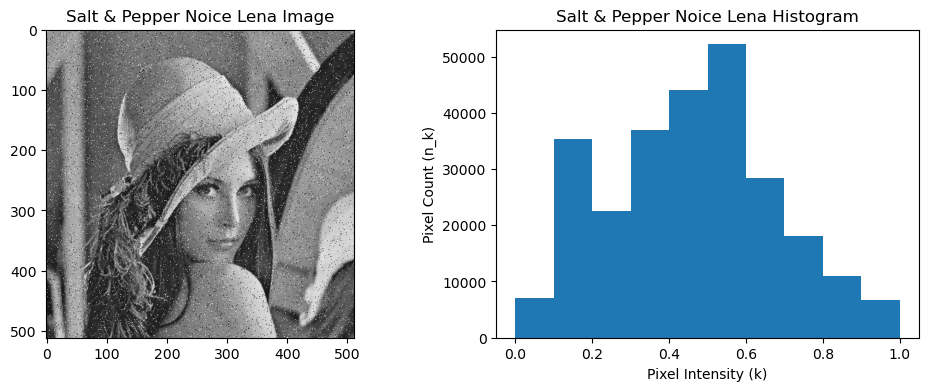

In [26]:
lena_salt_pepper = skimage.util.random_noise(lena, mode='s&p')
im_hist_show(lena_salt_pepper,'Salt & Pepper Noice Lena Image', 'Salt & Pepper Noice Lena Histogram')

26.176057385314095

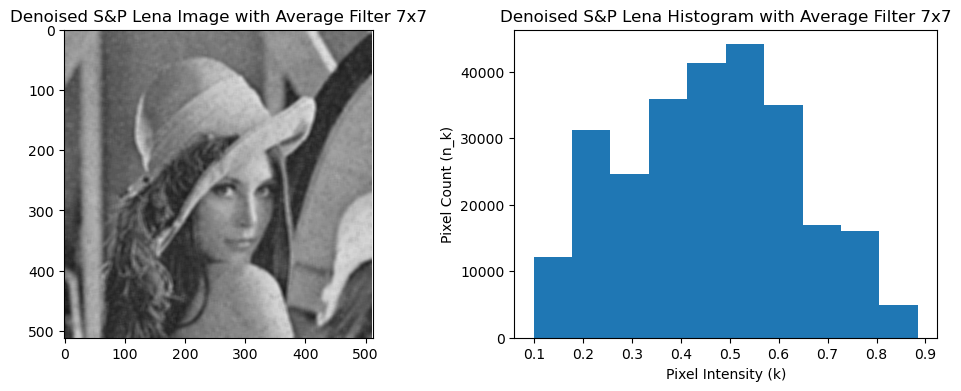

In [27]:
denoised_lena_sp_avg_7x7 = ndimage.convolve(lena_salt_pepper, avg_filter(7))
im_hist_show(denoised_lena_sp_avg_7x7,'Denoised S&P Lena Image with Average Filter 7x7', 'Denoised S&P Lena Histogram with Average Filter 7x7')
PSNR(lena, denoised_lena_sp_avg_7x7)

27.411775633291093

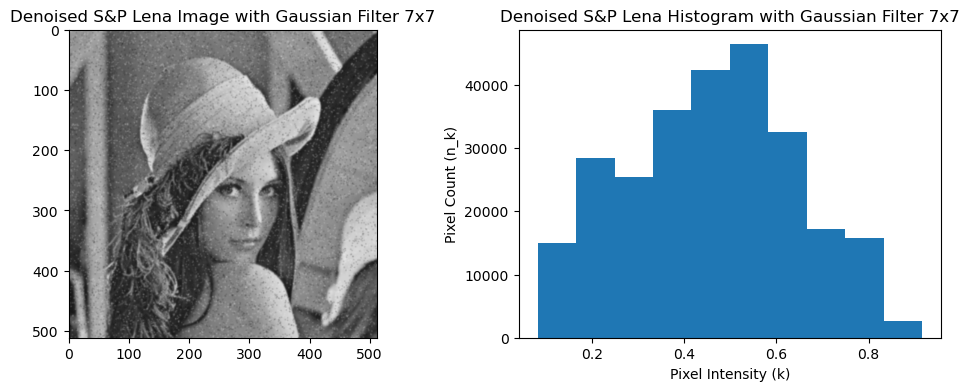

In [28]:
denoised_lena_sp_gaussian_7x7 = ndimage.convolve(lena_salt_pepper, gaussian_filter_7x7)
im_hist_show(denoised_lena_sp_gaussian_7x7,'Denoised S&P Lena Image with Gaussian Filter 7x7', 'Denoised S&P Lena Histogram with Gaussian Filter 7x7')
PSNR(lena, denoised_lena_sp_gaussian_7x7)

18. How does the averaging filter and Gaussian filtering methods perform on the noisy image in terms of noise reduction? Explain in terms of visual quality as well as PSNR. Why do we get such results?

Averaging filter: Performs worse on salt-and-pepper noise since it averages all pixels in the kernel, including noise pixels.

Gaussian filter: Performs slightly better because it weighs closer pixels more heavily, which reduces the impact of noisy pixels while filtering.

Visual quality: Gaussian filtering makes the image less blurry and has clearer edges compared to the averaging filter.

PSNR: Gaussian filtering has a slightly higher PSNR due to more effective noise reduction.

19. Compare the histograms of the denoised images with that of the noisy image. What characteristics are present in all of the histograms? Why?

The denoised histograms look similar to one another, but for the Gaussian filter, it is smoother with fewer extreme values, reflecting reduced noise. Comparing it to the noisy image histogram, the noisy image has spikes in intensities, due to the extreme pixel values form the salt and pepper.

Let us now apply a 3x3 median filter on the noisy image. The ndimage.median filter function will
come in handy for this. Plot the denoised image and the corresponding histogram. Also, compute the PSNR
between the denoised image and the original noise-free image.

34.299497970765096

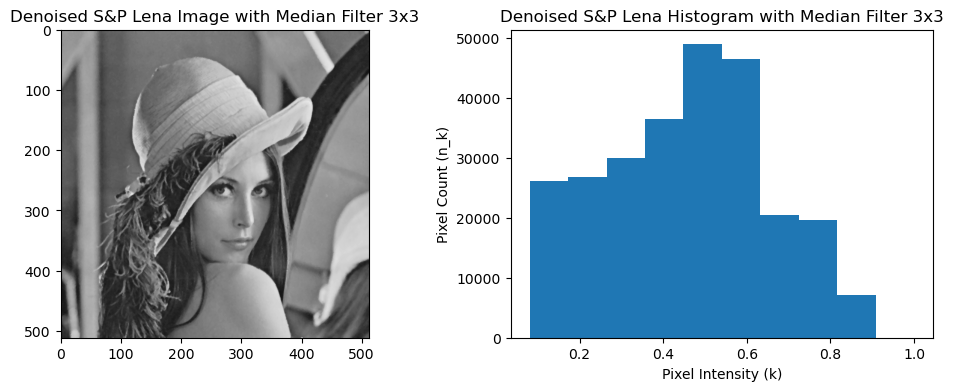

In [29]:
denoised_lena_median_filter_3x3 = ndimage.median_filter(lena_salt_pepper, size=(3,3))
im_hist_show(denoised_lena_median_filter_3x3,'Denoised S&P Lena Image with Median Filter 3x3', 'Denoised S&P Lena Histogram with Median Filter 3x3')
PSNR(lena, denoised_lena_median_filter_3x3)

20. How does the denoised image produced using the median filter compare with the denoised images produced using averaging filter (7x7) and Gaussian filtering methods? Explain in terms of visual quality as well as PSNR. Why do we get such results with median filter when compared to the other spatial filtering methods?

Median filtering is very effective at removing salt-and-pepper noise, as it replaces each pixel with the median value within the kernel, forcing a pixel to be like its neighbours, which removes outlier noise values.
As for the visual quality, the median filtering clearly outperforms both averaging and Gaussian filters for images with salt-and-pepper noise since it preserves edges while removing noise pixels. This is visible in the image as the median filter image is considerably less blurry than the Gaussian and average filter. 
PSNR: Median filtering results in a higher PSNR for salt-and-pepper noise. This makes sense as for certain types of noises, like salt-and-pepper, it performs best at removing noise compared to average and Gaussian.

5 Sharpening in the Spatial Domain

Let us now briefly study sharpening techniques based on spatial filtering as well as the effect of sharpening filter parameters on image quality. Load the Cameraman image and get intensity of the image within the range of 0 to 1. One very useful and customizable technique for sharpening images is high-boost filter. Let us study it at its various stages. First, apply the 7×7 Gaussian filter on the Cameraman image and subtract the Gaussian-filtered image from the original Cameraman image. Plot both the Gaussian-filtered image and the subtracted image.

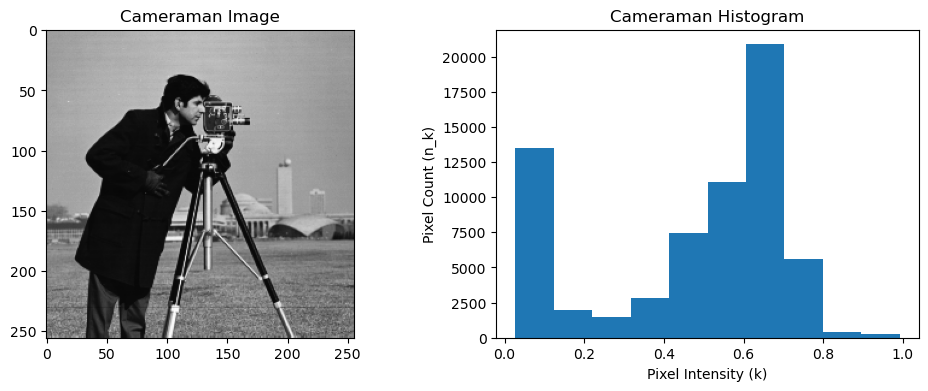

In [30]:
im_hist_show(cameraman,'Cameraman Image', 'Cameraman Histogram')

5.674262536851161

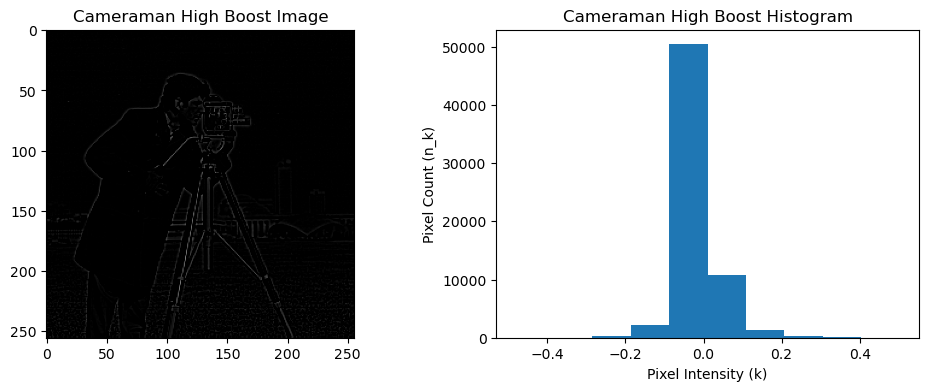

In [31]:
cameraman_gaussian_7x7 = ndimage.convolve(cameraman, gaussian_filter_7x7)
cameraman_high_boost = cameraman - cameraman_gaussian_7x7
im_hist_show(cameraman_high_boost,'Cameraman High Boost Image', 'Cameraman High Boost Histogram')
PSNR(cameraman, cameraman_high_boost)

21. What does the subtracted image look like? What frequency components from the original image are preserved in the subtracted image? Why?

The subtracted image only shows edges and high-frequency details, like edges of the camera and cameraman.
High-frequency components, such as sharp transitions and details, are preserved in the subtracted image. These are the areas where the intensity changes rapidly in the original image. The Gaussian filter primarily removes low-frequency components (smooth areas and gradual transitions), which leaves behind the sharp details (edges).

Now we add the subtracted image to the original image. Plot the resulting image.

In [32]:
cameraman_added = cameraman + cameraman_high_boost

26.10707759877798

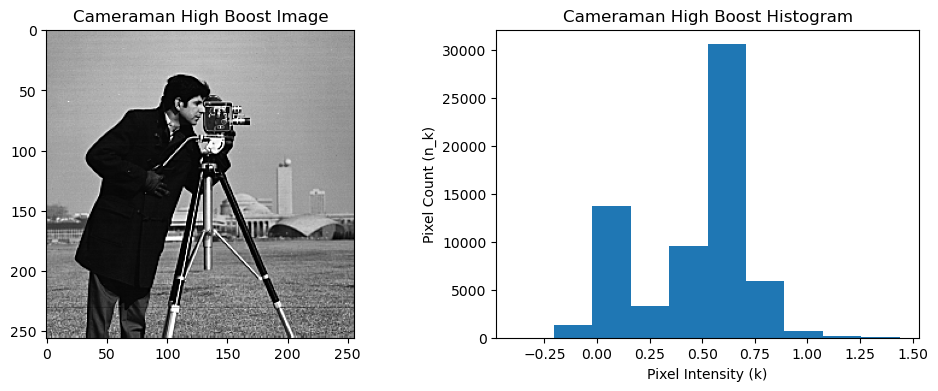

In [33]:
im_hist_show(cameraman_added,'Cameraman High Boost Image', 'Cameraman High Boost Histogram')
PSNR(cameraman, cameraman_added)

22. What does the resulting image look like? How does it differ from the original image? Explain why it appears this way.

The resulting image after adding the subtracted image to the original is sharper than the original. This is because the edges from the subtracted image are added back, enhancing sharp transitions in the image. The high-boost image emphasizes edges and sharp features more strongly, making it more defined compared to the original.

Now, instead of adding the subtracted image to the original image, multiply the subtracted image by 0.5 and
then add it to the original image. Plot the resulting image.

In [34]:
cameraman_2 = cameraman + cameraman_high_boost*0.5

32.12767751205761

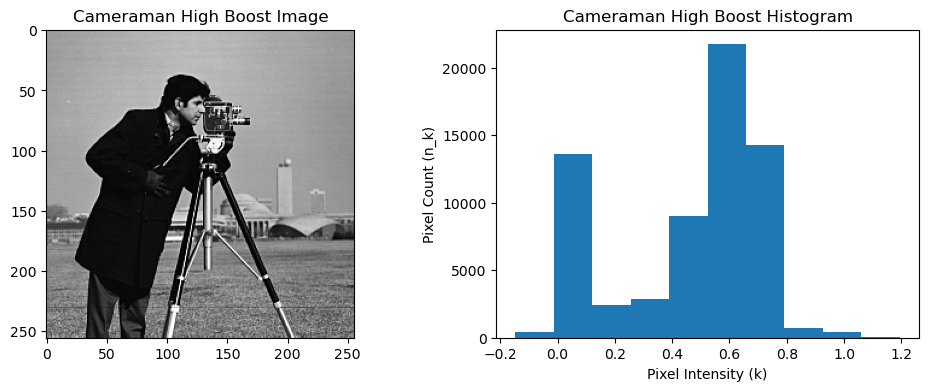

In [35]:
im_hist_show(cameraman_2,'Cameraman High Boost Image', 'Cameraman High Boost Histogram')
PSNR(cameraman, cameraman_2)

23. Compare the results produced by adding the subtracted image to the original image and that produced by adding half of the subtracted image to the original image. How does it differ? Explain why it appears this way.

Adding the full subtracted image results in a very sharp image, with edges being very apparent.
Adding half of the subtracted image sharpens the image, but the effect is more subtle compared to adding the full subtracted image.
Multiplying the subtracted image by 0.5 reduces the contribution of the high-frequency components before adding them to the original. This results in a less aggressive sharpening effect.

24. What does multiplying the subtracted image by a factor less than one accomplish? What about greater than one?

Multiplying by a factor less than one reduces the intensity of the high-frequency components before adding them to the original image, resulting in softer sharpening. It enhances edges without making the image look too artificial.
On the other hand, multiplying by a factor greater than one would amplify the high-frequency components, leading to more aggressive sharpening. This would make the image too sharp, introducing high-frequency noise.
